In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file=r'D:\Programing\python_projects\data_analysis\data_set\houseofwine.gr-wines.json'
df=pd.read_json(file, encoding='utf-8')
df.head()

,ageable,alcohol_%,avg_rating_%,color,description,drink_now,keep_2_3_years,n_votes,name,price,tags,url,year
0,False,8.5,,Λευκός,Κάποια από τα Riesling του Rheingau της Γερμαν...,False,True,,Riesling Spatlese 2013,33.7,"[Riesling, Ήπιος, Ημίγλυκος]",http://www.houseofwine.gr/how/riesling-spatles...,2013.0
1,False,13.5,,Λευκός,Τυπικό Νέο-Ζηλανδέζικο Sauvignon Blanc από ένα...,True,False,,Spy Valley - Sauvignon Blanc 2016,18.3,"[Ήπιος, Sauvignon Blanc, Ξηρός]",http://www.houseofwine.gr/how/spy-valley-sauvi...,2016.0
2,True,13.0,,Ερυθρός,Η κορωνίδα του Κτήματος Χρυσοχόου και ταυτόχρο...,False,False,,Cava Χρυσοχόου 2008,25.0,"[Ήπιος, Ξηρός, Ξινόμαυρο, Merlot]",http://www.houseofwine.gr/how/cava-hrysohoou.html,2008.0
3,False,12.5,90,Λευκός,Ένα από τα δημοφιλέστερα λευκά κρασιά στην Ελλ...,True,False,27,Κτήμα Γεροβασιλείου - Λευκός 2016,12.1,"[Ήπιος, Ξηρός, Ασύρτικο, Μαλαγουζιά]",http://www.houseofwine.gr/how/ktima-gerovasile...,2016.0
4,False,13.5,,Ερυθρός,Εισαγωγή στα κρασιά από τη γηγενή ποικιλία της...,False,True,,Landskroon - Pinotage 2013,13.1,"[Ήπιος, Ξηρός, Pinotage]",http://www.houseofwine.gr/how/landskroon-pinot...,2013.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ageable         1125 non-null   bool   
 1   alcohol_%       950 non-null    float64
 2   avg_rating_%    1125 non-null   object 
 3   color           1115 non-null   object 
 4   description     1125 non-null   object 
 5   drink_now       1125 non-null   bool   
 6   keep_2_3_years  1125 non-null   bool   
 7   n_votes         1125 non-null   object 
 8   name            1125 non-null   object 
 9   price           1120 non-null   float64
 10  tags            1125 non-null   object 
 11  url             1125 non-null   object 
 12  year            995 non-null    float64
dtypes: bool(3), float64(3), object(7)
memory usage: 91.3+ KB


In [3]:
# 清洗数据
df=df.replace('', np.nan, regex=True)
df=df.rename(columns={
    'alcohol_%': 'alcohol',
    'avg_rating_%': 'avg_rating'}, inplace=False)

In [5]:
# 特征类型转换
df['alcohol']=df['alcohol'].astype(float)
df['n_votes']=df['n_votes'].astype(int, errors='ignore')
df['price']=df['price'].astype(float)
df['year']=df['year'].astype(int, errors='ignore')

In [6]:
# color特征中希腊文转成英文
df['color']=df.color.replace({
    "Λευκός":'White',
    "Ερυθρός":'Red',
    "Ροζέ":'Rose'
})

[Text(0, 0.5, 'Wines'), Text(0.5, 1.0, 'Wine Color Frequency')]

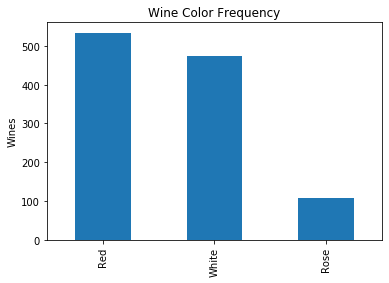

In [8]:
# 统计不同颜色的葡萄酒的数量
ax=df['color'].value_counts().plot(kind='bar')
ax.set(ylabel='Wines', title='Wine Color Frequency')

[Text(0.5, 0, 'Average Rating')]

D:\Programing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Programing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Programing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21806 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Programing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Programing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Programing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38144 missing from current f

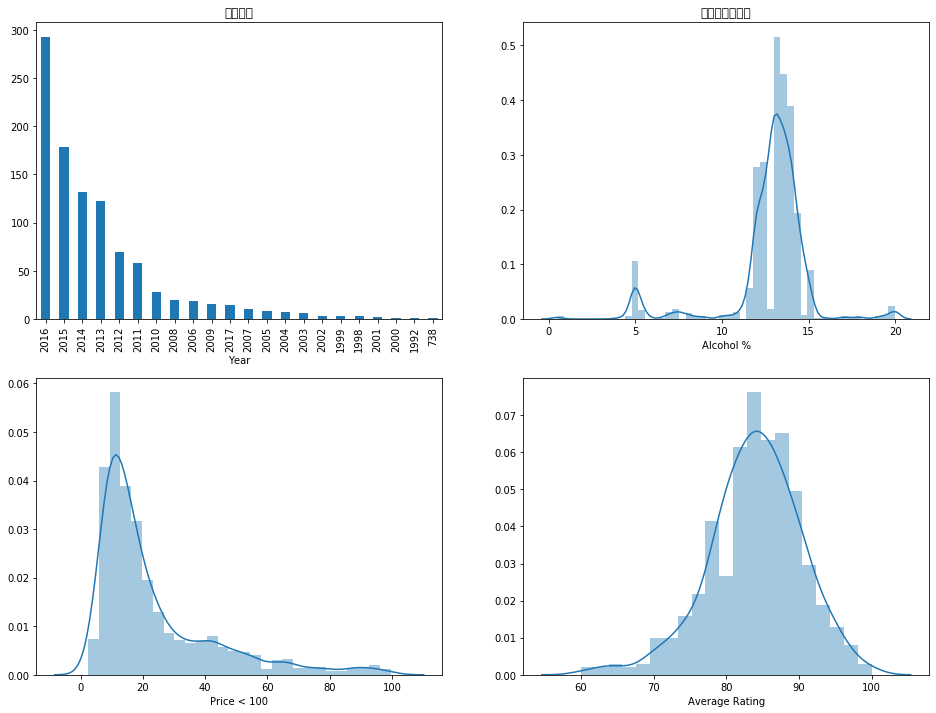

In [9]:
# 对整体统计
fig, ((ax1, ax2), (ax3, ax4))=plt.subplots(ncols=2, nrows=2, figsize=(16, 12))

# 特征year，每个样本的生产日期
# 删除缺失值，转化为整数，对样本计数，绘制柱形图
df.year.dropna().astype(int).value_counts().plot(kind='bar', ax=ax1)
ax1.set(title='年销售量', xlabel='Year')

# 特征alcohol，酒精浓度，直方图
sns.distplot(df[df.alcohol<100].alcohol.dropna(), ax=ax2)
ax2.set(title='酒精浓度分布图', xlabel='Alcohol %')

# 特征price，价格（欧元）
sns.distplot(df[df.price<100].price.dropna(), ax=ax3)
ax3.set(xlabel='Price < 100')

# 样本平均分，酒评分等级
sns.distplot(df.avg_rating.dropna(), ax=ax4)
ax4.set(xlabel='Average Rating')

In [10]:
# 寻找1982年的拉菲
wine_name=df['name'].str.split()
laf_name=[]
for name in wine_name:
    try:
        if 'Lafite' in name:
            laf_name.append(name)
    except:
        pass
print(laf_name)

[['Château', 'Lafite', 'Rothschild', '2005']]


In [12]:
lafname=' '.join(laf_name[0])
laf=df[df['name']==lafname]
laf[['name', 'price', 'year', 'color', 'avg_rating', 'alcohol']]


,name,price,year,color,avg_rating,alcohol
16,Château Lafite Rothschild 2005,3100.0,2005.0,Red,NaN,12.5
